<a href="https://colab.research.google.com/github/maharshi-coder-tech/Agile-Project-Management-Dashboard/blob/main/IIMA_Intern_Application_Government_of_India_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully with shape: (961, 3)

Summary Statistics:
             Income   Consumption      Gender
count  9.610000e+02  9.610000e+02  961.000000
mean   2.575565e+05  2.401659e+05    0.529657
std    1.846497e+05  1.425792e+05    0.499380
min    1.890100e+04  0.000000e+00    0.000000
25%    1.470010e+05  1.488651e+05    0.000000
50%    2.050010e+05  2.262722e+05    1.000000
75%    3.087010e+05  3.085111e+05    1.000000
max    1.641001e+06  1.141876e+06    1.000000

Mean values by gender:
               Income    Consumption
Gender                              
0       250897.903097  233612.844472
1       263469.359136  245985.101280


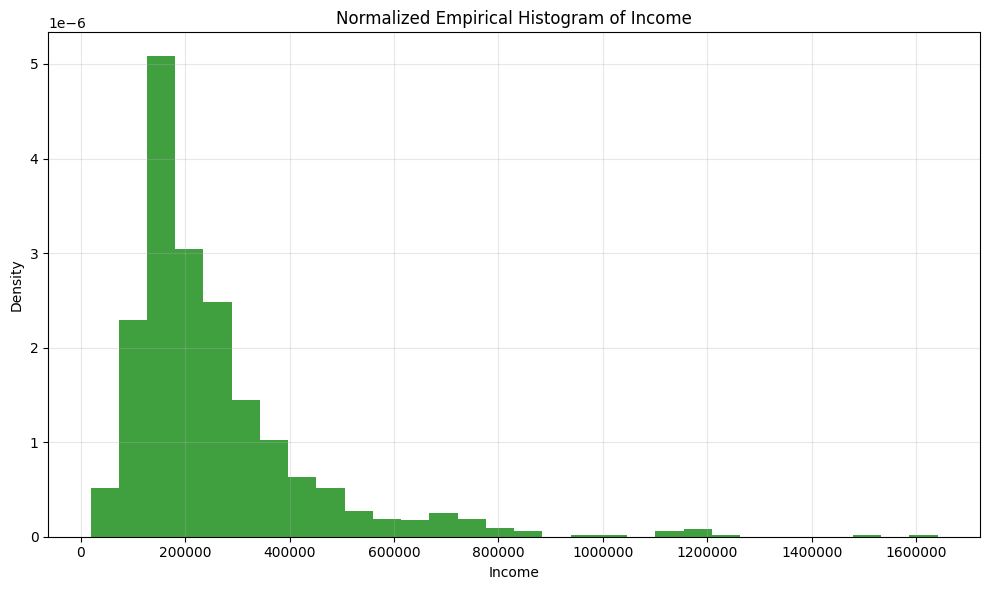


Distribution Fit Results:
Lognormal parameters: μ=12.3407, σ=0.5654
Lognormal - Log-Likelihood: -12691.87, AIC: 25387.74
Gamma parameters: shape=8.3295, scale=49097.1417
Gamma - Log-Likelihood: -13925.56, AIC: 27855.12


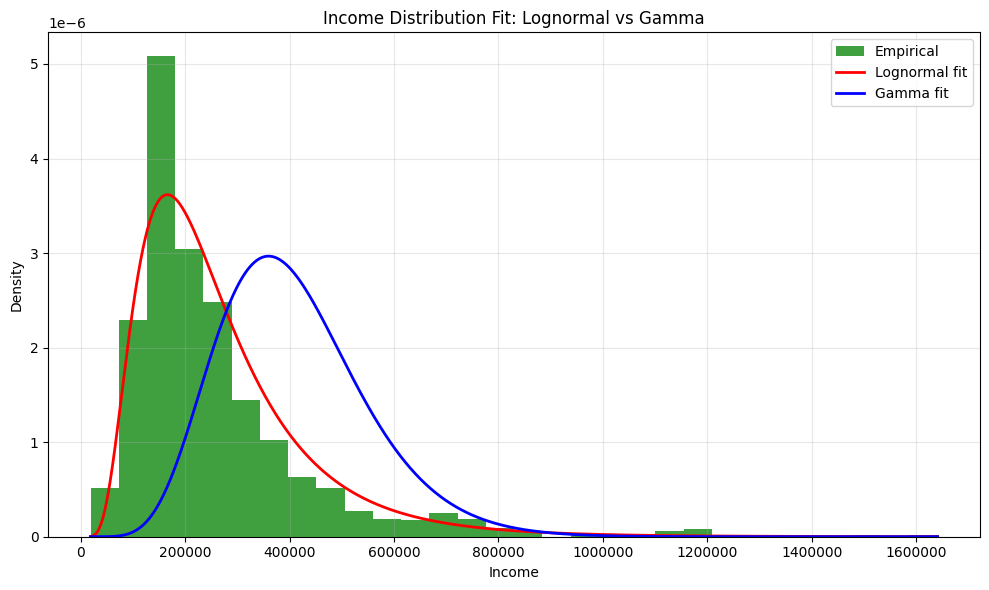


Regression Results for MPC Estimation:
                            OLS Regression Results                            
Dep. Variable:            Consumption   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     694.3
Date:                Sun, 11 May 2025   Prob (F-statistic):          4.36e-187
Time:                        15:27:26   Log-Likelihood:                -12337.
No. Observations:                 961   AIC:                         2.468e+04
Df Residuals:                     958   BIC:                         2.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

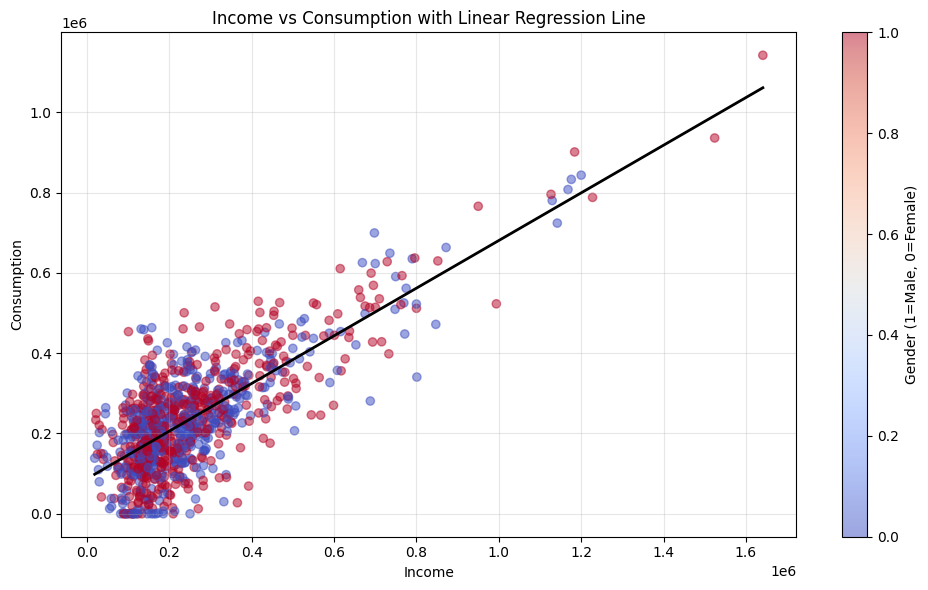

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import statsmodels.api as sm

# 1. Load the data
df = pd.read_csv('/content/data_income_consumption_gender.xlsx - Data Task_Intern.csv', header=None)
df.columns = ['Income', 'Consumption', 'Gender']
print("Data loaded successfully with shape:", df.shape)

# 2. Generate summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)

# Additional statistics by gender
gender_stats = df.groupby('Gender').mean()
print("\nMean values by gender:")
print(gender_stats)

# 3. Plot normalized histogram of income
plt.figure(figsize=(10, 6))
# Create histogram with density=True for normalization
n, bins, patches = plt.hist(df['Income'], bins=30, density=True, alpha=0.75, color='green')
plt.grid(True, alpha=0.3)
plt.title('Normalized Empirical Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.savefig('normalized_income_histogram.png')
plt.show()

# 4. Fit distributions to income data
# Prepare income data
income_data = df['Income'].values

# Lognormal fit using MLE
shape_lognorm, loc_lognorm, scale_lognorm = stats.lognorm.fit(income_data)
mu_lognorm = np.log(scale_lognorm)
sigma_lognorm = shape_lognorm
lognorm_ll = np.sum(np.log(stats.lognorm.pdf(income_data, s=sigma_lognorm, scale=scale_lognorm)))
lognorm_aic = -2 * lognorm_ll + 2 * 2  # 2 parameters: mu, sigma

# Gamma fit using MLE
shape_gamma, loc_gamma, scale_gamma = stats.gamma.fit(income_data)
gamma_ll = np.sum(np.log(stats.gamma.pdf(income_data, shape_gamma, scale=scale_gamma)))
gamma_aic = -2 * gamma_ll + 2 * 2  # 2 parameters: shape, scale

# Print distribution parameters and fit statistics
print("\nDistribution Fit Results:")
print(f"Lognormal parameters: μ={mu_lognorm:.4f}, σ={sigma_lognorm:.4f}")
print(f"Lognormal - Log-Likelihood: {lognorm_ll:.2f}, AIC: {lognorm_aic:.2f}")
print(f"Gamma parameters: shape={shape_gamma:.4f}, scale={scale_gamma:.4f}")
print(f"Gamma - Log-Likelihood: {gamma_ll:.2f}, AIC: {gamma_aic:.2f}")

# Plot data with fitted distributions
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(income_data, bins=30, density=True, alpha=0.75, color='green', label='Empirical')

# Create x values for smooth curve plotting
x = np.linspace(min(income_data), max(income_data), 1000)

# Plot fitted distributions
plt.plot(x, stats.lognorm.pdf(x, s=sigma_lognorm, scale=scale_lognorm),
         'r-', linewidth=2, label='Lognormal fit')
plt.plot(x, stats.gamma.pdf(x, shape_gamma, scale=scale_gamma),
         'b-', linewidth=2, label='Gamma fit')

plt.grid(True, alpha=0.3)
plt.title('Income Distribution Fit: Lognormal vs Gamma')
plt.xlabel('Income')
plt.ylabel('Density')
plt.ticklabel_format(style='plain', axis='x')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('income_distribution_fit.png')
plt.show()

# 5. Regression Analysis for MPC
# Add constant term for intercept
X = sm.add_constant(df[['Income', 'Gender']])
Y = df['Consumption']

# Fit OLS model
model = sm.OLS(Y, X).fit()

# Print regression results
print("\nRegression Results for MPC Estimation:")
print(model.summary())

# Extract MPC (coefficient of Income)
mpc = model.params['Income']
print(f"\nEstimated Marginal Propensity to Consume (MPC): {mpc:.3f}")
print(f"95% Confidence Interval for MPC: [{model.conf_int().loc['Income'][0]:.3f}, {model.conf_int().loc['Income'][1]:.3f}]")

# Additional visualizations: Income vs Consumption with regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Consumption'], alpha=0.5, c=df['Gender'], cmap='coolwarm')
plt.colorbar(label='Gender (1=Male, 0=Female)')

# Plot regression line
x_range = np.linspace(df['Income'].min(), df['Income'].max(), 100)
y_pred = model.params['const'] + model.params['Income'] * x_range + model.params['Gender'] * 0.5
plt.plot(x_range, y_pred, 'k-', linewidth=2)

plt.title('Income vs Consumption with Linear Regression Line')
plt.xlabel('Income')
plt.ylabel('Consumption')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('income_consumption_regression.png')
plt.show()



Breusch-Pagan Test for Heteroskedasticity:
{'LM Statistic': np.float64(1.8793040193976371), 'LM p-value': np.float64(0.39076379371131936), 'F Statistic': np.float64(0.9385540621361741), 'F p-value': np.float64(0.39155246643597086)}

Lilliefors Test for Normality of Residuals:
KS Statistic: 0.0194, p-value: 0.5821


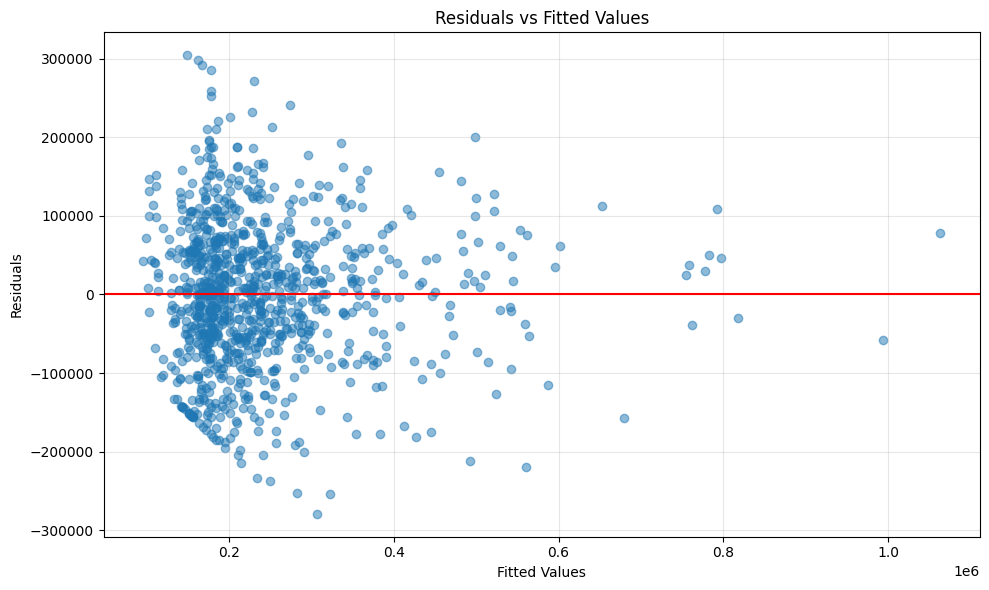

In [3]:
# Additional analysis: Test for heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
print("\nBreusch-Pagan Test for Heteroskedasticity:")
print(dict(zip(labels, bp_test)))

# Test for normality of residuals
from statsmodels.stats.diagnostic import lilliefors
ks_stat, p_value = lilliefors(model.resid)
print("\nLilliefors Test for Normality of Residuals:")
print(f"KS Statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('residuals_plot.png')
plt.show()
